# Loss function Rodrigues

$𝒟 = \{ \mathbf{x}_n, \mathbf{y}_n\}$ be a dataset of size $N$

$\mathbf{x}_n \in \mathbb{R}^D$

${\mathbf{y}}^r_n\in[0,1]^K$:   label provided for the r-th annotator in a set of R annotators

$𝒛_n$ Latent true class determined by a softmax output layer  of a DNN


$\mathbf{\sigma}\in \mathbb{R} ^Q$: DNN-based feature representation. correspond to the output of a softmax layer

$\hat{\mathbf{y}}^r_n = f_r(\sigma)\in[0,1]^{1 \times K}$

$\hat{\mathbf{y}}_n=[\hat{\mathbf{y}}^1_n,\hat{\mathbf{y}}^2_n,\dots,\hat{\mathbf{y}}^R_n]\in [0,1]^{1\times (R\times K)}$

Activation of the crowd layer for each anotator  $ \mathbf{a}^r = f_r(\sigma)$, where $f_r$ is an annotator-specific function, and the output of the crowd layer simply as the softmax of the
activations $o_c^r = e^{a_c^r}/\sum_{l=1}^{C}e^{a_l^r}$.


 $f_r(\sigma)= \mathbf{W}^r\mathbf{\sigma}$

 $\mathbf{W}^r$ is an annotator-specific matrix

 **Cost function**

 $E(\mathbf{o}^r, y^r)$
 between the expected output of the r-th annotator and its actual label $y^r$,

Then, 

if we make. $\lambda_n^r(\theta) = \mathbf{1}$ in PRI loss



$$\min_\theta \sum_n\left(\sum_r \lambda_n^r(\theta)H({\mathbf{y}}^r_n;\hat{\mathbf{y}}_n(\theta))\right)+\left(H(\hat{\mathbf{y}}_n(\theta))\sum_r\left(1-\lambda_n^r(\theta)\right)\right)$$

 
we can obtain rodriguez


$$\min_\theta \sum_n\left(\sum_r (\mathbf{1})H({\mathbf{y}}^r_n;\hat{\mathbf{y}}_n(\theta))\right)+\left(H(\hat{\mathbf{y}}_n(\theta))\sum_r\left(1-\mathbf{1}\right)\right)$$

In [1]:
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, roc_auc_score, mutual_info_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import mode 
import numpy as np

def ook(t):
  lb = LabelBinarizer()
  y_ook = lb.fit_transform(t)  

  if len(np.unique(t))==2:
    y_ook = np.concatenate((1-y_ook.astype(bool), y_ook), axis = 1) 

  return y_ook

 

def evaluation_metrics(y_true, y_pred, print_result=True):
    acc = 0
    auc = 0
    auc_sk = 0
    #mi = 0
    nmi = 0
    #ami = 0
    bacc = 0
    
    # Accuracy
    #report = classification_report(y_pred.argmax(axis=1), y_true.ravel(), output_dict=True)
    acc = accuracy_score( y_true.ravel(), y_pred.argmax(axis=1))  #report['accuracy']
    
    # Balanced accuracy
    bacc = balanced_accuracy_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze(), adjusted=True)
    
   # # Mutual Information
   # mi = mutual_info_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze())
    
    # Normalized Mutual Information
    nmi = normalized_mutual_info_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze())
    
    # Adjusted Mutual Information
    #ami = adjusted_mutual_info_score(y_true.squeeze(), y_pred.argmax(axis=1).squeeze())
    
    # AUC (Tensorflow)
    auc_metric = tf.keras.metrics.AUC(from_logits=True)
    auc_metric.update_state(y_true, y_pred.argmax(axis=1).astype('float'))
    auc = auc_metric.result().numpy()
    auc_metric.reset_states()
    
    # AUC (scikit-learn)
    auc_sk = roc_auc_score(ook(y_true), y_pred)
    
    if print_result:
        print("Accuracy: {:.4f}".format(acc))
        print("Balanced Accuracy: {:.4f}".format(bacc))
        print("Mutual Information: {:.4f}".format(mi))
        print("Normalized Mutual Information: {:.4f}".format(nmi))
        print("Adjusted Mutual Information: {:.4f}".format(ami))
        print("AUC (Tensorflow): {:.4f}".format(auc))
        print("AUC (scikit-learn): {:.4f}".format(auc_sk))
    
    return acc, auc, auc_sk, nmi, bacc   # mi, , ami




In [2]:
 #data downloaded for google drive
FILEID = "1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O datos.zip && rm -rf /tmp/cookies.txt
!unzip -o datos.zip
!dir
database = 'Western'

--2023-02-13 08:11:50--  https://docs.google.com/uc?export=download&confirm=t&id=1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn
Resolving docs.google.com (docs.google.com)... 142.251.107.101, 142.251.107.102, 142.251.107.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.107.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/obf0l6gmojr8fpd59ponggm9l8od8ahe/1676275875000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=503092d4-7cf5-470f-90ee-6d6393bb81c8 [following]
--2023-02-13 08:11:51--  https://doc-10-0s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/obf0l6gmojr8fpd59ponggm9l8od8ahe/1676275875000/09173029842254050324/*/1IC11LrPCZIo_Am5eXP2p2tDAlrGTlPjn?e=download&uuid=503092d4-7cf5-470f-90ee-6d6393bb81c8
Resolving doc-10-0s-docs.googleusercontent.com (doc-10-0s-docs.googleusercontent.com)... 173.194.216.

# Subclassing for Crowdlayer Rodriguez

In [3]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow_probability as tfp
from tensorflow.keras import regularizers
from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import train_test_split
tf.keras.backend.clear_session()
#tf.random.set_seed(42)
import types
import tempfile
class Keras_MA_CrowdL(): #transformer no va
 #Constructor __init__. Special method: identified by a double underscore at either side of their name
 #work in the background
 # initialize data members to the object. lets the class initialize the object’s attributes and serves no other purpose.
    def __init__(self,epochs=100,batch_size=30,R=5, K=2, dropout=0.5, learning_rate=1e-3,optimizer='Adam', 
                  l1_param=0, validation_split=0.3, verbose=0, neurons=4):
        #print('init')
        self.epochs=epochs
        self.dropout=dropout
        self.batch_size = batch_size
        self.learning_rate=learning_rate 
        self.l1_param=l1_param 
        self.l2_param=l1_param
        self.validation_split = validation_split
        self.verbose = verbose
        self.optimizer = optimizer
        self.R=R
        self.K=K
        self.neurons = neurons

    
 
    def custom_CLR_loss(self, y_true, y_pred): #ytrue \in N x R,  ypred \in N x K x R  ->CrowdLayerRodriguez
        #print(y_true.shape)
        Y_true_1K = tf.one_hot(tf.cast(y_true,dtype=tf.int32),depth=self.K,axis=1) #samples, classes 1-K, annotators
        #print(Y_true_1K.shape)    
        vec = tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=Y_true_1K, axis = 1)
        #print(vec.shape)
        #mask = tf.equal(Y_true_1K[:,0,:], -1)
        #zer = tf.zeros_like(vec)
        #loss = tf.where(mask, x=zer, y=vec)
        #tf.print("loss", loss)
        return tf.math.reduce_sum(vec)
    
    def fit(self, X, Y):
            
        def scheduler1(step = 10, ratio = 1.2):
          def scheduler(epoch, lr):
            if epoch % step == 0 and epoch>1:
              return lr/ratio
            else:
              return lr
          return scheduler

        initializer = tf.keras.initializers.GlorotNormal(seed=100)
        #input X numpy array first dimension samples (N)x features (P)
        #input Y numpy array vector len = samples (N) x  annotators (R)
        P = X.shape[1]
        
        if self.optimizer == "Adam":
            opt = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        elif self.optimizer == "SGD":
            opt = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)
        elif self.optimizer == "RMSprop":
            opt = tf.keras.optimizers.RMSprop(learning_rate=self.learning_rate)
        elif self.optimizer == "Adagrad":
            opt = tf.keras.optimizers.Adagrad(learning_rate=self.learning_rate)
        else:
            opt=self.optimizer


#         if self.loss == "RCDNN":
#           sel_loss = self.custom_RCDNN_loss
#         elif  self.loss == "GCE":
#           sel_loss = self.GCE_MA_loss
        
        #capa de entrada
        input_l = tf.keras.layers.Input(shape=(X.shape[1]), name='entrada')
        input_l_b = tf.keras.layers.BatchNormalization()(input_l)        
        input_l_do = tf.keras.layers.Dropout(rate=self.dropout)(input_l_b)    
        #capas densas
        h1 = tf.keras.layers.Dense(int(P*self.neurons*(self.K+self.R)),activation='selu',name='h1', bias_initializer='zeros', kernel_initializer=initializer,
                              kernel_regularizer=tf.keras.regularizers.l1_l2(l1=self.l1_param,l2=self.l2_param))(input_l_do)#argumento de entrada
       # h1 = tf.keras.layers.BatchNormalization()(h1)        
        h1 = tf.keras.layers.AlphaDropout(rate=self.dropout)(h1)      
        h2 = tf.keras.layers.Dense(int(P*(self.K+self.R)),activation='selu',name='h2', bias_initializer='zeros', kernel_initializer=initializer,
                              kernel_regularizer=tf.keras.regularizers.l1_l2(l1=self.l1_param,l2=self.l2_param))(h1)
        #h2 = tf.keras.layers.BatchNormalization()(h2)     
        dout = tf.keras.layers.AlphaDropout(rate=self.dropout)(h2)
        output_dense = tf.keras.layers.Dense(self.K,activation="softmax",name='output',
                               kernel_regularizer=tf.keras.regularizers.l1_l2(l1=self.l1_param,l2=self.l2_param))(dout)
        output= CrowdsClassification(self.K, self.R, conn_type="MW")(output_dense) #Classes x Annotators
        self.model = tf.keras.Model(inputs= input_l,outputs=output)
        self.model.compile(loss= self.custom_CLR_loss, optimizer=opt)
        
        callback1 = tf.keras.callbacks.TerminateOnNaN()
        callback2 = tf.keras.callbacks.LearningRateScheduler(scheduler1(ratio = 1))
        #callback2 = tf.keras.callbacks.LearningRateScheduler(scheduler2)
        callback3 = tf.keras.callbacks.EarlyStopping(monitor="loss", min_delta=1e-2,
                                                 patience=15, verbose=0, mode="auto",
                                                 baseline=None, restore_best_weights=True)
        
        
        self.history = self.model.fit(X, Y, epochs=self.epochs, validation_split= self.validation_split, callbacks = [callback1, callback2],     #
                                      batch_size=self.batch_size,verbose=self.verbose)
        #model_p  to predict labels in gridsearch  
        self.model_p = tf.keras.Model(inputs=self.model.inputs,outputs=self.model.get_layer('output').output) #se accede a capas por nombre
        #resumen y gráfica del modelo
        #print(self.model.summary())
        
        return self
 
 

    def predict2(self, X, *_):
      return  self.model_p.predict(X)

     
    def predict(self, X, *_):

       #print('predict') 
       return  self.model.predict(X) 

    def fit_predict(self,X,y):
        #input X numpy array first dimension samples (N)x features (P)
        #input Y numpy array vector len = samples (N) x  annotators (R)
        
        self.fit(X,y)
        return self.predict(X)
  
     #graphics
    def plot_history(self):
        pd.DataFrame(self.history.history).plot(figsize=(8, 5))
        plt.grid(True)
        #plt.gca().set_ylim(0, 1)
        #save_fig("keras_learning_curves_plot")
        plt.show()
        return
    
    def set_params(self, **parameters):
        #print('set_params') 
        for parameter, value in parameters.items():
            setattr(self, parameter, value)

        return self
    
    
    
    def get_params(self, deep=True):
        #print('get_params') 
        return { 'l1_param':self.l1_param, 'dropout':self.dropout, 'optimizer':self.optimizer,
                'learning_rate':self.learning_rate, 'batch_size':self.batch_size,
                'epochs':self.epochs, 'verbose':self.verbose, 'validation_split':self.validation_split,
                'R':self.R, 'K':self.K
                }

# Crowdlayer class

In [4]:
 
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K1
from tensorflow.keras.layers import Layer
#from tensorflow.keras.engine.topology import Layer

def init_identities(shape, dtype=None):
    out = np.zeros(shape)
    for r in range(shape[2]):
        for i in range(shape[0]):
            out[i,i,r] = 1.0
    return out
    
class CrowdsClassification(Layer):


  
  #The build() method’s role is to create the layer’s variables, by calling the 
  #add_weight() method for each weight.  which is often necessary to create some of the weights.
  #we need to know the number of neurons in the previous layer in order to create the connection weights matrix (i.e., the "kernel"): 
  #this corresponds to the size of the last dimension of the inputs. 
   
    def __init__(self, output_dim, num_annotators, conn_type="MW", **kwargs):
        self.output_dim = output_dim
        self.num_annotators = num_annotators
        self.conn_type = conn_type
        super(CrowdsClassification, self).__init__(**kwargs)



    def build(self, input_shape):
        if self.conn_type == "MW":
            # matrix of weights per annotator
      #A layer is a callable object that takes as input one or more tensors and that outputs one or more tensors. 
      #It involves computation, defined in the call() method, and a state (weight variables). 
      #the method add_weight() offers a shortcut to create weights.

            self.kernel = self.add_weight("CrowdLayer", (self.output_dim, self.output_dim, self.num_annotators),
                                            initializer=init_identities, #It is the stated initializer instance
                                            trainable=True) # trainable weights, updated via backpropagation during training
        elif self.conn_type == "VW":
            # vector of weights (one scale per class) per annotator
            self.kernel = self.add_weight("CrowdLayer", (self.output_dim, self.num_annotators),
                                            initializer=keras.initializers.Ones(), 
                                            trainable=True)
        elif self.conn_type == "VB":
            # two vectors of weights (one scale and one bias per class) per annotator
            self.kernel = []
            self.kernel.append(self.add_weight("CrowdLayer", (self.output_dim, self.num_annotators),
                                            initializer=keras.initializers.Zeros(),
                                            trainable=True))
        elif self.conn_type == "VW+B":
            # two vectors of weights (one scale and one bias per class) per annotator
            self.kernel = []
            self.kernel.append(self.add_weight("CrowdLayer", (self.output_dim, self.num_annotators),
                                            initializer=keras.initializers.Ones(),
                                            trainable=True))
            self.kernel.append(self.add_weight("CrowdLayer", (self.output_dim, self.num_annotators),
                                            initializer=keras.initializers.Zeros(),
                                            trainable=True))
        elif self.conn_type == "SW":
            # single weight value per annotator
            self.kernel = self.add_weight("CrowdLayer", (self.num_annotators,1),
                                            initializer=keras.initializers.Ones(),
                                            trainable=True)
        else:
            raise Exception("Unknown connection type for CrowdsClassification layer!")
    #At the end of the build() method (and only at the end), 
    #you must call the parent’s build() method: this tells Keras that the layer is built (it just sets self.built = True).
        super(CrowdsClassification, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x):
    
    #The call() method actually performs the desired operations. In this case, 
    #we compute the matrix multiplication of the inputs X and the layer’s kernel and 
    #this gives us the output of the layer.
     
 

        if self.conn_type == "MW":
            res = K1.dot(x, self.kernel)
        elif self.conn_type == "VW" or self.conn_type == "VB" or self.conn_type == "VW+B" or self.conn_type == "SW":
            out = []
            for r in range(self.num_annotators):
                if self.conn_type == "VW":
                    out.append(x * self.kernel[:,r])
                elif self.conn_type == "VB":
                    out.append(x + self.kernel[0][:,r])
                elif self.conn_type == "VW+B":
                    out.append(x * self.kernel[0][:,r] + self.kernel[1][:,r])
                elif self.conn_type == "SW":
                    out.append(x * self.kernel[r,0])
            res = tf.stack(out)
            if len(res.shape) == 3:
                res = tf.transpose(res, [1, 2, 0])
            elif len(res.shape) == 4:
                res = tf.transpose(res, [1, 2, 3, 0])
            else:
                raise Exception("Wrong number of dimensions for output")
        else:
            raise Exception("Unknown connection type for CrowdsClassification layer!") 
        
        return res
 
#The compute_output_shape() method simply returns the shape of this layer’s outputs. 
#In this case, it is the same shape as the inputs, except the last two dimensions is replaced 
#with the number of clases and # annotators in the layer.  
 

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim, self.num_annotators)

# Load Data

In [5]:
#load data
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf #importar tensorflow
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
 
#main libraries and functions
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import warnings
#compute centroid index 
from sklearn.metrics import pairwise_distances
import matplotlib

warnings.filterwarnings('ignore')


def centroid_(X):
  mean_X = X.mean(axis=0)#computing mean along samples
  D = pairwise_distances(mean_X.reshape(1,-1),X)
  return np.argmin(D)#return centroid index


#loading data
path_ = 'CaractCE.mat'#Case Western Database
dicX = sio.loadmat(path_)

In [6]:
Xt = dicX['F'] #time segments
Fs = 12000 #sampling frequency
Tl = Xt.shape[1]/Fs
print('Xt shape:',Xt.shape)
print('Time length [s]', Tl)

Xt shape: (1200, 4000)
Time length [s] 0.3333333333333333


In [7]:
#loading precalculated MPE features
X = dicX['CE']
print('MPE feature matriz shape:',X.shape)

MPE feature matriz shape: (1200, 125)


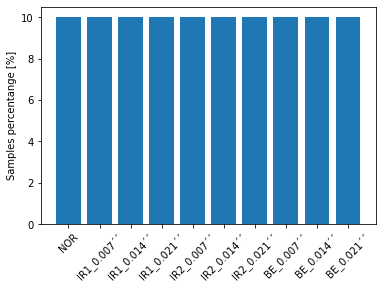

In [8]:
Y = dicX['E']
Ytrue = Y[:,2] #target classes

labels_ = ['NOR','IR1_0.007´´','IR1_0.014´´','IR1_0.021´´',
           'IR2_0.007´´','IR2_0.014´´','IR2_0.021´´',
           'BE_0.007´´','BE_0.014´´','BE_0.021´´'
           ] #classes name

#histogram
unique_elements, counts_elements = np.unique(Ytrue, return_counts=True)
plt.bar(unique_elements,100*counts_elements/X.shape[0])
plt.xticks(unique_elements)
plt.ylabel('Samples percentange [%]')
plt.gca().set_xticklabels(labels_,rotation=45)
plt.show()

In [9]:
#rpm labels
nrpm = 30
Yrpm_b = np.r_[0*np.ones(nrpm),np.ones(nrpm),2*np.ones(nrpm),3*np.ones(nrpm)]
Yrpm_b.shape
Yrpm = Yrpm_b
for i in range(len(labels_)-1):
  Yrpm = np.r_[Yrpm,Yrpm_b]


In [10]:
Y = np.c_[Y,Yrpm]

In [11]:
import joblib

CaseWestern_data = {'Xdata_time' : Xt, 'Fs' : Fs,
                    'Xdata_MPE' : X, 'Y_labels' : Y}

joblib.dump(CaseWestern_data,"CasaWestern_data.pkl")

['CasaWestern_data.pkl']

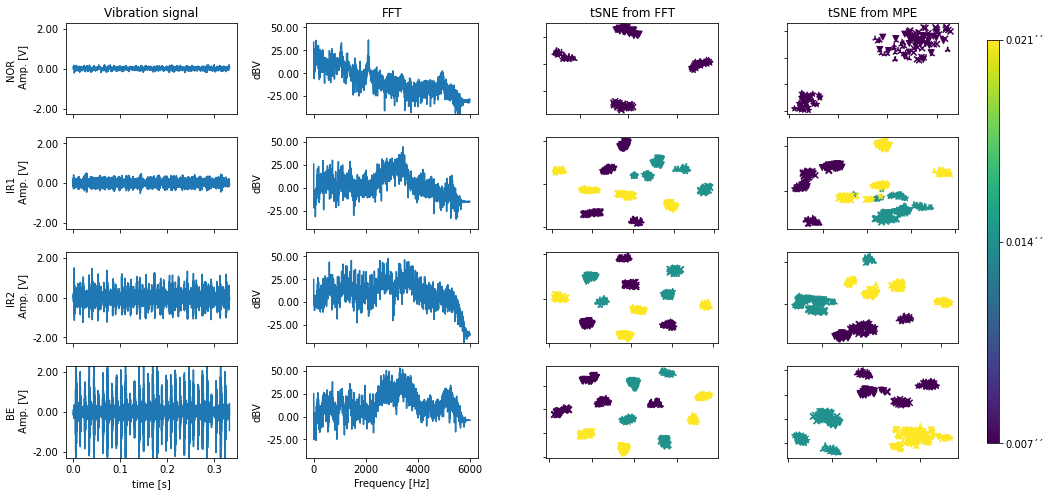

In [12]:
#scatter plots
scar = StandardScaler()
sca = MinMaxScaler()
red = TSNE(perplexity = 10,n_components=2,random_state=123)
vt = np.arange(0,Tl,1/Fs)
Ytrue_f = Y[:,1] # labels = [Normal, Internal, External, Ball]
labels_f = ['NOR', 'IR1', 'IR2', 'BE']
#scatter along fault lables
fig, axs = plt.subplots(len(labels_f),4,figsize=(16, 8))
j=0
vf = np.fft.rfftfreq(Xt.shape[1],1/Fs) #freq vector
Xw = 20*np.log10(abs(np.fft.rfft(Xt))) # FFT

marker_s = ['2','v','x','*'] # RPM1, RPM2, RPM3, RPM4 as marker changes

for i in np.unique(Ytrue_f):
  X_ = Xt[Ytrue_f==i]
  Xw_ = Xw[Ytrue_f==i]
  XE_ = X[Ytrue_f==i]
  Z_ = scar.fit_transform(red.fit_transform(sca.fit_transform(Xw_)))
  Z_e = scar.fit_transform(red.fit_transform(sca.fit_transform(XE_)))
   
  #identify centroid RPM1 
  ind = centroid_(Z_[Yrpm[Ytrue_f==i] == 0])
  #time plots
  axs[j,0].plot(vt,X_[ind])
  axs[j,0].set_ylim([-2.3,2.3])
  axs[j,0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
  axs[j,0].set_ylabel(labels_f[j]+' \n Amp. [V]')
  if j!=len(labels_f)-1: axs[j,0].set_xticklabels([])

  #frequency plots
  axs[j,1].plot(vf,Xw_[ind])
  axs[j,1].set_ylim([-45,55])
  axs[j,1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
  axs[j,1].set_ylabel('dBV')
  if j!=len(labels_f)-1: axs[j,1].set_xticklabels([])

  #scatter plots
  cc = Ytrue[Ytrue_f==i]
  #FFT-based features scatter plot
  for ii in np.unique(Yrpm): 
      ind_ = Yrpm[Ytrue_f==i] == ii
      im = axs[j,2].scatter(Z_[ind_,0],Z_[ind_,1],c=cc[ind_],marker=marker_s[int(ii)])
      #axs[j,2].scatter(Z_[ind,0],Z_[ind,1],c='r',marker='v')
      axs[j,2].set_xticklabels([])
      axs[j,2].set_yticklabels([])

      #MPE-based features scatter plot
      im = axs[j,3].scatter(Z_e[ind_,0],Z_e[ind_,1],c=cc[ind_],marker=marker_s[int(ii)])
      #axs[j,3].scatter(Z_e[ind,0],Z_e[ind,1],c='r',marker='v')
      axs[j,3].set_xticklabels([])
      axs[j,3].set_yticklabels([])
  j+=1

cax = fig.add_axes([0.925, 0.15, 0.01, 0.7])
norm = matplotlib.colors.Normalize(vmin=0,vmax=2)
sm = plt.cm.ScalarMappable(cmap=None, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm,cax=cax,ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['0.007´´', '0.014´´', '0.021´´'])

axs[-1,0].set_xlabel('time [s]')
axs[-1,1].set_xlabel('Frequency [Hz]')  
axs[0,0].set_title('Vibration signal')
axs[0,1].set_title('FFT')
axs[0,2].set_title('tSNE from FFT')
axs[0,3].set_title('tSNE from MPE')


fig.subplots_adjust(wspace=0.4, hspace=0.25)
plt.show()



In [13]:
X.shape

(1200, 125)

In [14]:
Ytrue.min()
#X = Xw

1

# Labels Generation  

In [15]:
import random
import warnings
import numpy as np
#import climin
from functools import partial
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

#Defining the Sigmoid function and Softmax function
def Sigmoid(f_r):
    lam_r = 1/(1 + np.exp(-f_r))
    return lam_r

def MAjVot(Y, K):
    N,R = Y.shape
    Yhat = np.zeros((N,1))
    for n in range(N):
        votes = np.zeros((K,1))
        for r in range(R):
            for k in range(K):
                if Y[n,r] == k+1:
                    votes[k] = votes[k]+1
        Yhat[n] = np.argmax(votes) + 1
    return Yhat


def  MA_Clas_Gen(Xtrain,ytrain,R,NrP):

    N = len(ytrain)
    K = len(np.unique(ytrain))
    Kn = np.unique(ytrain)
    aux = 0
    A = np.zeros((K,1))
    for k in Kn:
        A[aux] = (ytrain == k).sum()
        aux = aux + 1
    per = np.min(A)
    if N < 25000:
        Xtrain = TSNE(n_components=1,perplexity=per/2).fit_transform(Xtrain)
    else:
        Xtrain = np.sum(Xtrain,1)
     
    Xtrain = Xtrain - Xtrain.min()
    #print(Xtrain.min(), Xtrain.max())
    Xtrain = Xtrain/Xtrain.max()
    Xtrain = Xtrain.reshape((N,1))
    yprueba = np.ones((N,1))
    
    
    u_q = np.empty((Xtrain.shape[0],3))
    u_q[:,0,None] = 4.5*np.cos(2*np.pi*Xtrain + 1.5*np.pi) - \
                               3*np.sin(4.3*np.pi*Xtrain + 0.3*np.pi)
                    
    u_q[:,1,None] = 4.5*np.cos(1.5*np.pi*Xtrain + 0.5*np.pi) + \
                       5*np.sin(3*np.pi*Xtrain + 1.5*np.pi)
    
    u_q[:,2,None] = 1
    
    W = []
    # q=1
    Wq1 = np.array(([[0.4],[0.7],[-0.5],[0],[-0.7]]))
    W.append(Wq1)
    # q=2
    Wq2 = np.array(([[0.4],[-1.0],[-0.1],[-0.8],[1.0]]))
    W.append(Wq2)
    Wq3 = np.array(([[3.1],[-1.8],[-0.6],[-1.2],[1.0]]))
    W.append(Wq3)

    
    F_r = []
    Lam_r = []
    for r in range(R):
        f_r = np.zeros((Xtrain.shape[0], 1))
        # rho_r = np.zeros((Xtrain.shape[0], 1))
        for q in range(3):
            f_r += W[q][r].T*u_q[:,q,None]
        F_r.append(f_r)
        lam_r = Sigmoid(f_r)
        lam_r[lam_r>0.5] = 1
        lam_r[lam_r<=0.5] = 0
        Lam_r.append(lam_r)
    plt.plot(Xtrain,Lam_r[2],'rx')
    plt.show()
    seed = 0
    np.random.seed(seed)
    Ytrain = np.ones((N, R))
    for r in range(R):
        aux = ytrain.copy()
        for n in range(N):
            if Lam_r[r][n] == 0:
                labels = np.arange(1, K+1)
                a = np.where(labels==ytrain[n])
                labels = np.delete(labels, a)
                idxlabels = np.random.permutation(K-1)
                aux[n] = labels[idxlabels[0]]         
        Ytrain[:,r] = aux.flatten()
        
   # Ytrain = (Ytrain*maxy) + miny
        
    iAnn = np.zeros((N, R), dtype=int) # this indicates if the annotator r labels the nth sample.
    Nr = np.ones((R), dtype=int)*int(np.floor(N*NrP))  
    for r in range(R):
        if r < R-1:
            indexR = np.random.permutation(range(N))[:Nr[r]]
            iAnn[indexR,r] = 1
        else:
            iSimm = np.sum(iAnn, axis=1)
            idxZero = np.asarray([i for (i, val) in enumerate(iSimm) if val == 0])
            Nzeros = idxZero.shape[0]
            idx2Choose = np.arange(N)
            if Nzeros == 0:
                indexR = np.random.permutation(range(N))[:Nr[r]]
                iAnn[indexR,r] = 1
            else:
                idx2Choose = np.delete(idx2Choose, idxZero)
                N2chose = idx2Choose.shape[0]
                idxNoZero = np.random.permutation(N2chose)[:(Nr[r] - Nzeros)]
                idxTot = np.concatenate((idxZero, idx2Choose[idxNoZero]))
                iAnn[idxTot,r] = 1
    
    # Now, we verify that all the samples were labeled at least once
    Nr = (np.sum(iAnn,0))
    iSimm = np.sum(iAnn, axis=1)
    if np.asarray([i for (i, val) in enumerate(iSimm) if val == 0]).sum() == 0:
        ValueError("all the samples must be labeled at least once")

    # Finally, if iAnn=0 we assign a reference value to indicate a missing value
    Vref = -1e-20
    for r in range(R):
        Ytrain[iAnn[:,r] == 0, r] = Vref 

    return Ytrain, iAnn, Lam_r


def CrossVal(X, pp, Nk):
    N = X.shape[0]
    Ntr = int(N*pp)
    Nte = N - Ntr
    idxtr = np.zeros((Ntr,Nk))
    idxte = np.zeros((Nte,Nk))
    
    for i in range(Nk):
        index = np.random.permutation(range(N))
        idxtr[:,i] = index[:Ntr]
        idxte[:,i] = index[Ntr:]
        
    return idxtr, idxte
    
    
        


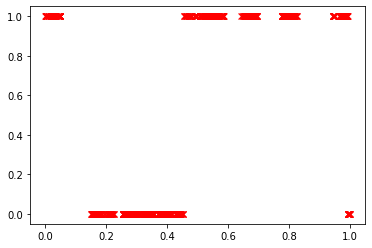

In [16]:
Y, iAnn, Lam_r = MA_Clas_Gen(X ,Ytrue, R=5, NrP=1)

In [17]:
Y = Y - 1
t = Ytrue- 1

annotator 1
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       120
           1       1.00      0.01      0.02       120
           2       0.87      1.00      0.93       120
           3       0.91      0.91      0.91       120
           4       0.85      1.00      0.92       120
           5       0.90      1.00      0.95       120
           6       0.88      1.00      0.93       120
           7       0.86      1.00      0.92       120
           8       0.89      0.83      0.86       120
           9       0.90      1.00      0.95       120

    accuracy                           0.88      1200
   macro avg       0.89      0.88      0.83      1200
weighted avg       0.89      0.88      0.83      1200

annotator 2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.66      0.68      0.67       120
           2       0.60      0.59      0.59       120


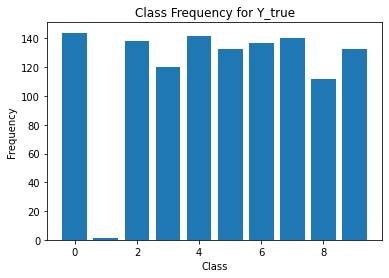

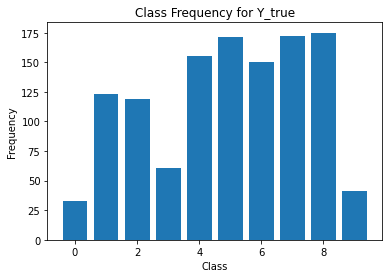

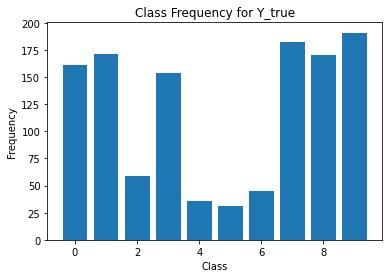

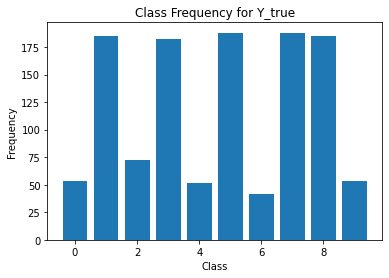

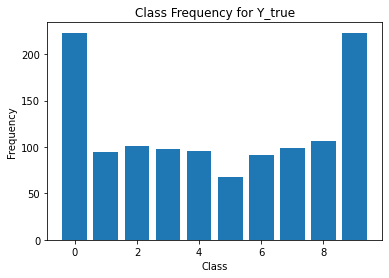

In [18]:
import pandas as pd
from sklearn.metrics import classification_report
for i in range(Y.shape[1]):
    print('annotator',i+1)
    print(classification_report(t,Y[:,i]))
    unique, counts = np.unique(Y[:,i], return_counts=True)
    plt.figure()
    plt.bar(unique, counts)
    #     unique, counts = np.unique(Y_test[5], return_counts=True)
    #     plt.bar(unique, counts)

    plt.title('Class Frequency for Y_true')
    plt.xlabel('Class')
    plt.ylabel('Frequency')

# Split data

In [19]:
import numpy.matlib
from sklearn.model_selection import  StratifiedShuffleSplit, ShuffleSplit
Ns = 1
ss = ShuffleSplit(n_splits=Ns, test_size=0.3, random_state =123)
for train_index, test_index in ss.split(X):
    print(test_index)
    X_train, X_test,Y_train,Y_test = X[train_index,:], X[test_index,:],Y[train_index,:], Y[test_index,:]
    Y_true_train, Y_true_test = t[train_index].reshape(-1,1), t[test_index].reshape(-1,1)
print(X_train.shape, Y_train.shape, Y_true_train.shape)

[ 156  920  971  897   35  599  567  553  891 1010  524  440 1141  579
  138  566 1186  172  961  610  662  186  134  418  427  245  571  226
  348 1071  637  203 1136  210  701  879  314  448 1088  406  375 1011
  972  694  167  654 1069  678  982 1026  591 1195 1105  690  528  800
  987  568  935   42  476  693  758  486   97  299  746  305    5  490
  336  310  600  968  511  565   72  587  702  656   18   13  774  807
  960  895  802 1117 1044  279  664   67  512  921  136 1157  150 1085
   69  923  384 1106  964  456  825  204  318  196  362  887  417   85
 1051  278  209  499 1019  154  779  844  351  739   98  560  462   86
   45  590  304  228  898  332  103  882  688  429  178  319 1043  822
 1182  294  188  943  229 1114   68  177  621  677 1123  507  376 1007
  787  810  141  756 1033  163  120  240  976  252   95  529  352  431
  617  309  437  870  161  902  772  627  681  266  861  206  909  725
  221 1130 1116 1148  801  768  948  580  754  805 1119  373  973  594
  839 

# Apply MinMaxScaler

In [20]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
len(np.unique(Y_test))

10

In [22]:
#testing PRI as ground truth -> repeat true labels as multiple annotators
Y_true_train_K = np.matlib.repmat(Y_true_train,1, Y_train.shape[1])#testing MA as classifier
#print(X_train.shape,Y_true_train_K.shape)
# Y_train_one_hot_targets = tf.one_hot(tf.cast(Y_train , tf.int32), len(np.unique(Y_true_test)), axis = 1, dtype=tf.int32)
# Y_train_one_hot_targets.shape

# Testing the Class 

In [23]:
# from sklearn.metrics import classification_report, balanced_accuracy_score
# from sklearn.metrics import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score

# l1 =0.001
# NUM_RUNS =10
# ACC = np.zeros(NUM_RUNS)
# AUC = np.zeros(NUM_RUNS)
# MI = np.zeros(NUM_RUNS)
# NMI = np.zeros(NUM_RUNS)
# AMI = np.zeros(NUM_RUNS)
# BACC = np.zeros(NUM_RUNS)
# for i in range(NUM_RUNS): #10
#     print("iteration: " + str(i))
   
#     MA = Keras_MA_CrowdL(epochs=100,batch_size=32,R= Y_train.shape[1], K=len(np.unique(Y_true_test)), dropout=0.25, learning_rate=0.001,optimizer='Adam', 
#                 l1_param=l1,  validation_split=0.3, verbose=0)



#     MA.fit(X_train, Y_train)
#     #MA.plot_history()
  
#     #Accuracy  
    
#     #estimar etiquetas modelo rodiguez 
#     preds_test_num =  MA.predict2(X_test)
    
#     #Accuracy
#     report = classification_report(Y_true_test,preds_test_num,output_dict=True)
#     ACC[i] = report['accuracy']
    
#     print("Validation ACC: %.4f" % (float(report['accuracy']),))
    
#     #AUC
#     val_AUC_metric = tf.keras.metrics.AUC( from_logits = True)  
#    # val_logits =MA.predict(X_test) # model(X_test, training=False)
#     # tf.print(y_batch_val)
#     val_AUC_metric.update_state(Y_true_test,  preds_test_num.astype('float'))

#     val_AUC = val_AUC_metric.result()
#     val_AUC_metric.reset_states()
#     val_AUC = val_AUC.numpy()
#     print("Validation aUc: %.4f" % (float(val_AUC),))
#     AUC[i] = val_AUC
    



#     # balanced. Accurcy
#     BACC[i] = balanced_accuracy_score(Y_true_test.squeeze(), preds_test_num.squeeze(), adjusted=True)
#     print("Validation Balanced_ACC: %.4f" % (float(BACC[i])))

#     #MI
    
#     MI[i] = mutual_info_score(Y_true_test.squeeze(), preds_test_num.squeeze())
#     print("Validation MI: %.4f" % (float(MI[i]),))
#     NMI[i] = normalized_mutual_info_score(Y_true_test.squeeze(), preds_test_num.squeeze())
#     print("Validation Normalized MI: %.4f" % (float(NMI[i]),))
#     AMI[i]= adjusted_mutual_info_score(Y_true_test.squeeze(), preds_test_num.squeeze())
#     print("Validation Adjusted MI: %.4f" % (float(AMI[i]),))




iteration: 0


2023-02-13 08:12:11.499147: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-02-13 08:12:12.141230: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


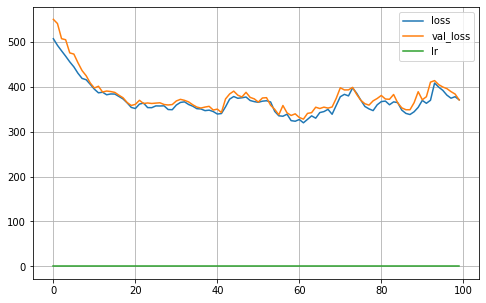

iteration: 1


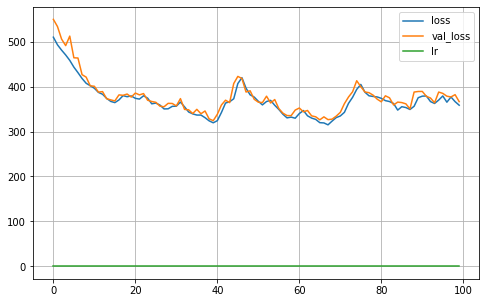

iteration: 2


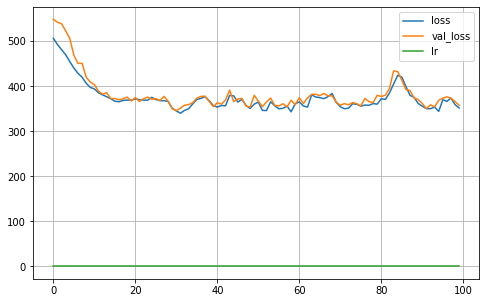

iteration: 3


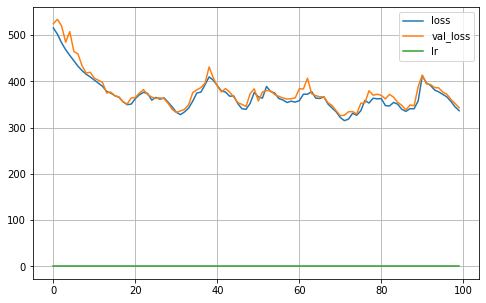

iteration: 4


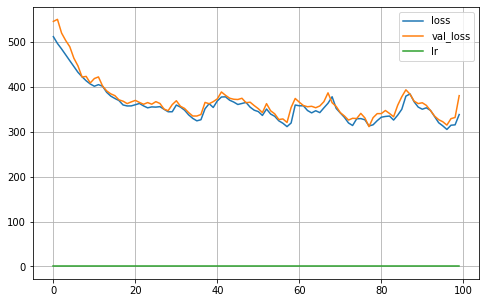

iteration: 5


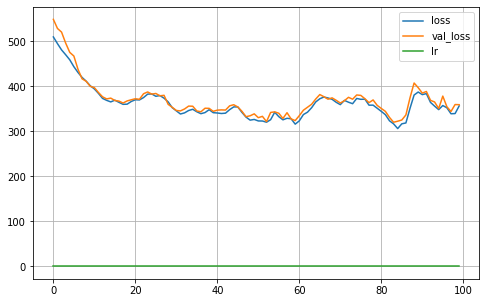

iteration: 6


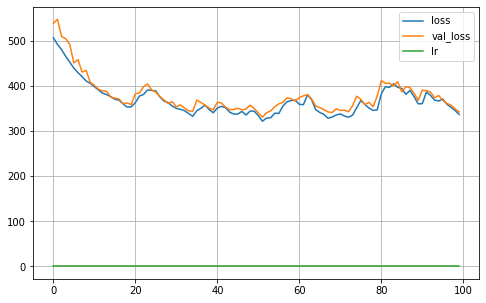

iteration: 7


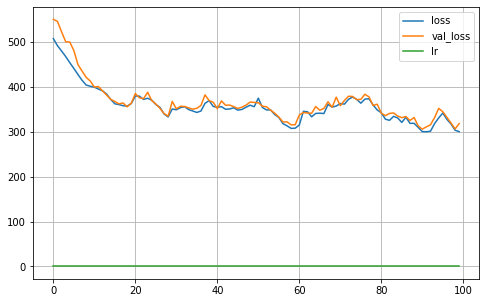

iteration: 8


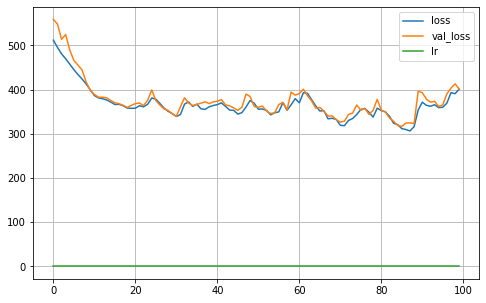

iteration: 9


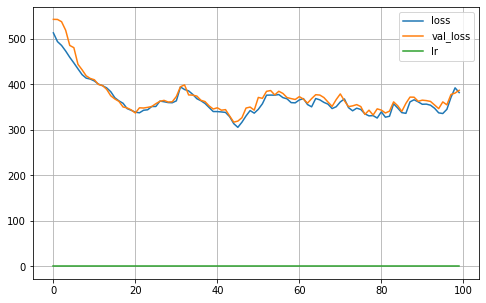

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 914.8 kB/s eta 0:00:00


In [24]:
from sklearn.metrics import classification_report, balanced_accuracy_score, roc_auc_score
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score
import pandas as pd
l1 =0.001
NUM_RUNS =10
custom_loss = "Rod"


results = []
for i in range(NUM_RUNS):

    print("iteration: " + str(i))
   
    MA = Keras_MA_CrowdL(epochs=100,batch_size=32,R= Y_train.shape[1], K=len(np.unique(Y_true_test)), dropout=0.25, learning_rate=0.001,optimizer='Adam', 
                l1_param=l1,  validation_split=0.3, verbose=0)

    
    MA.fit(X_train, Y_train)
    MA.plot_history()
  
    # Generate the predictions for the current run
    pred_2 = MA.predict2(X_test)
     
    acc, auc, auc_sk,  nmi,  bacc = evaluation_metrics(Y_true_test,  pred_2, print_result=False)  # mi, ami,
    
    # Save the results for the current run to the list of dictionaries
    results.append({
        #'run': i,
        'accuracy': acc,
        'balanced_accuracy': bacc,
       # 'mutual_information': mi,
        'normalized_mutual_information': nmi,
     #   'adjusted_mutual_information': ami,
        'auc_tensorflow': auc,
        'auc_scikit_learn': auc_sk,
    })
    
# Convert the list of dictionaries to a DataFrame
df = np.round(pd.DataFrame(results)*100, 2)

# Calculate the mean and standard deviation of each metric
mean = np.round(df.mean(),2)
std = np.round(df.std(),2)  



 

result_df = pd.concat([mean.rename('Mean'), std.rename('Std')], axis=1)



# Save the DataFrame to an excel file
!pip install openpyxl
result_df.to_excel('/kaggle/working/'+ database + custom_loss + ".xlsx")

In [25]:
df

,accuracy,balanced_accuracy,normalized_mutual_information,auc_tensorflow,auc_scikit_learn
0,86.39,82.94,90.40,99.849998,92.05
1,96.39,95.21,94.88,100.000000,98.07
2,95.28,94.01,92.55,100.000000,97.38
3,76.67,73.11,87.75,100.000000,87.53
4,78.06,72.54,84.71,96.620003,86.55
5,74.72,75.00,90.71,100.000000,87.54
6,85.00,82.87,89.66,99.849998,91.85
7,89.44,89.60,87.84,100.000000,96.82
8,88.06,84.87,92.18,100.000000,92.66
9,76.11,74.97,88.56,100.000000,87.94


In [26]:
result_df

,Mean,Std
accuracy,84.61,7.94
balanced_accuracy,82.51,8.50
normalized_mutual_information,89.92,2.90
auc_tensorflow,99.63,1.06
auc_scikit_learn,91.84,4.41
